In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd

# 1. 데이터 불러오기 (헤더가 두 줄인 경우)
file_path = '연도별 학업중단률.xlsx'
df = pd.read_excel(file_path, header=[0,1])
df

학년도   시도 학업 중단률(%)             \
                                             학년도   시도    고등교육기관  전문대학 교육대학   
0                                           2019   전체       6.8   8.1  1.5   
1                                           2020   전체       6.6   7.6  1.7   
2                                           2021   전체       6.8   8.1  2.4   
3                                           2022   전체       7.0   8.6  3.2   
4                                           2023   전체       7.2   9.0  4.2   
..                                           ...  ...       ...   ...  ...   
87                                          2021   제주       7.0   7.9    -   
88                                          2022   제주       6.9   7.4    -   
89                                          2023   제주       9.3  13.7    -   
90                                            주석  NaN       NaN   NaN  NaN   
91  출처: 한국교육개발원 교육통계서비스(https://kess.kedi.re.kr)  NaN       NaN   NaN  NaN   

                                ... 재적학생수                                   \
   일반대학 방송통신대학 산업대학  기술대학 각종학교  ...  기술대학    각종학교    원격대학     사이버대학   사내대학   
0   4.6   22.7  8.9   5.3  3.4  ...  76.0  3455.0  2382.0  125165.0  451.0   
1   4.6   23.1  9.7     0  2.5  ...  60.0  3431.0  2172.0  130311.0  414.0   
2   4.9   21.1  8.7     0  3.9  ...  62.0  3438.0  2486.0  142127.0  340.0   
3   5.2   20.8   10   4.3  3.4  ...  46.0  3426.0  2836.0  145934.0  334.0   
4   5.3     22  9.6  13.8  3.3  ...  29.0  3433.0  3267.0  145480.0  371.0   
..  ...    ...  ...   ...  ...  ...   ...     ...     ...       ...    ...   
87  6.2      -    -     -    -  ...   0.0     0.0     0.0       0.0    0.0   
88  6.3      -    -     -    -  ...   0.0     0.0     0.0       0.0    0.0   
89  6.1      -    -     -    -  ...   0.0     0.0     0.0       0.0    0.0   
90  NaN    NaN  NaN   NaN  NaN  ...   NaN     NaN     NaN       NaN    NaN   
91  NaN    NaN  NaN   NaN  NaN  ...   NaN     NaN     NaN       NaN    NaN   

                                                   
       전공대학     기능대학       대학원   대학원(석사)  대학원(박사)  
0   14245.0  26828.0  319240.0  243298.0  75942.0  
1   15267.0  26051.0  320595.0  241650.0  78945.0  
2   14821.0  23910.0  327415.0  245679.0  81736.0  
3   15036.0  21878.0  333907.0  248940.0  84967.0  
4   15160.0  19717.0  336596.0  250518.0  86078.0  
..      ...      ...       ...       ...      ...  
87      0.0     61.0    2451.0    1940.0    511.0  
88      0.0     64.0    2388.0    1894.0    494.0  
89      0.0     71.0    2354.0    1852.0    502.0  
90      NaN      NaN       NaN       NaN      NaN  
91      NaN      NaN       NaN       NaN      NaN  

[92 rows x 50 columns]

In [3]:
# 2. ‘전체’ 시도만 필터링
df_tot = df[df[('시도','시도')] == '전체']
df_tot.head()

학년도  시도 학업 중단률(%)                                        ... 재적학생수  \
    학년도  시도    고등교육기관 전문대학 교육대학 일반대학 방송통신대학 산업대학  기술대학 각종학교  ...  기술대학   
0  2019  전체       6.8  8.1  1.5  4.6   22.7  8.9   5.3  3.4  ...  76.0   
1  2020  전체       6.6  7.6  1.7  4.6   23.1  9.7     0  2.5  ...  60.0   
2  2021  전체       6.8  8.1  2.4  4.9   21.1  8.7     0  3.9  ...  62.0   
3  2022  전체       7.0  8.6  3.2  5.2   20.8   10   4.3  3.4  ...  46.0   
4  2023  전체       7.2  9.0  4.2  5.3     22  9.6  13.8  3.3  ...  29.0   

                                                                          \
     각종학교    원격대학     사이버대학   사내대학     전공대학     기능대학       대학원   대학원(석사)   
0  3455.0  2382.0  125165.0  451.0  14245.0  26828.0  319240.0  243298.0   
1  3431.0  2172.0  130311.0  414.0  15267.0  26051.0  320595.0  241650.0   
2  3438.0  2486.0  142127.0  340.0  14821.0  23910.0  327415.0  245679.0   
3  3426.0  2836.0  145934.0  334.0  15036.0  21878.0  333907.0  248940.0   
4  3433.0  3267.0  145480.0  371.0  15160.0  19717.0  336596.0  250518.0   

            
   대학원(박사)  
0  75942.0  
1  78945.0  
2  81736.0  
3  84967.0  
4  86078.0  

[5 rows x 50 columns]

In [4]:
# 3. 그래프 대상 교육기관 목록 (대학원 제외)
institutions = [
    '고등교육기관', '전문대학', '교육대학', '일반대학', '방송통신대학',
    '산업대학', '기술대학', '각종학교', '원격대학', '사이버대학',
    '사내대학', '전공대학', '기능대학'
]

# 4. 연도와 학업 중단률(%) 추출 및 숫자형 변환
years = df_tot[('학년도','학년도')].astype(str)
rates = df_tot['학업 중단률(%)'][institutions].apply(pd.to_numeric, errors='coerce')

years

0    2019
1    2020
2    2021
3    2022
4    2023
Name: (학년도, 학년도), dtype: object

In [5]:
rates

,고등교육기관,전문대학,교육대학,일반대학,방송통신대학,산업대학,기술대학,각종학교,원격대학,사이버대학,사내대학,전공대학,기능대학
0,6.8,8.1,1.5,4.6,22.7,8.9,5.3,3.4,20.5,16.9,10.2,8.4,9.0
1,6.6,7.6,1.7,4.6,23.1,9.7,0.0,2.5,16.5,15.7,1.4,8.0,9.2
2,6.8,8.1,2.4,4.9,21.1,8.7,0.0,3.9,22.3,15.6,2.9,7.6,9.5
3,7.0,8.6,3.2,5.2,20.8,10.0,4.3,3.4,24.7,14.5,0.9,8.8,11.1
4,7.2,9.0,4.2,5.3,22.0,9.6,13.8,3.3,25.1,15.6,1.1,10.6,12.1


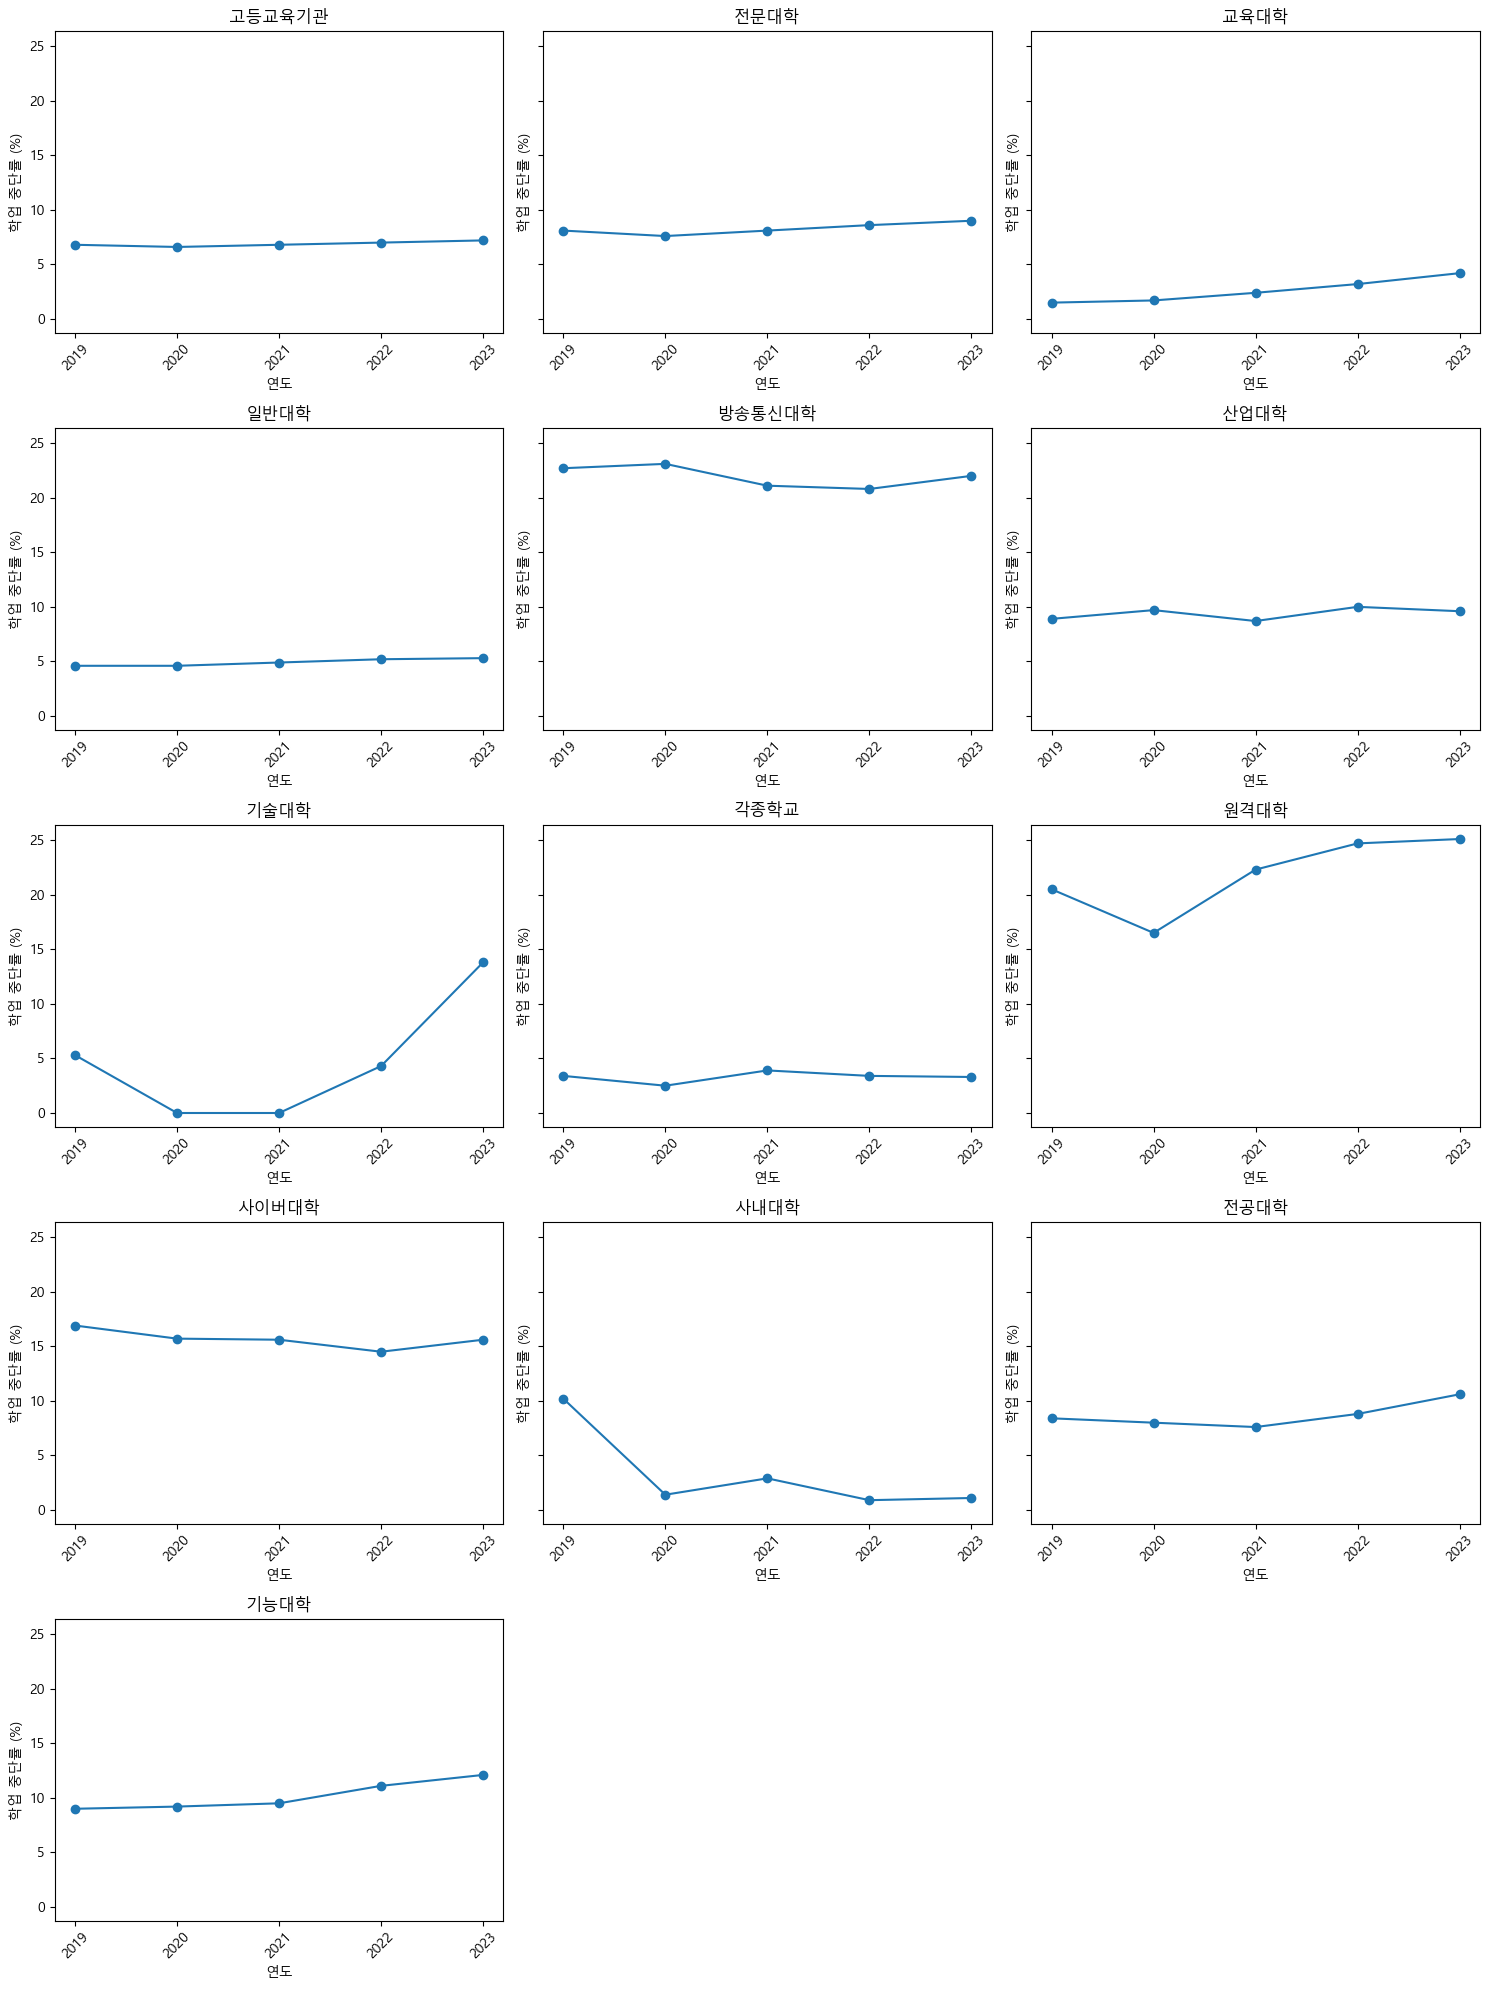

In [6]:
# 5. 작은 다중 그래프(Subplots) 설정
n = len(institutions)
cols = 3                           # 한 행에 3개 그래프
rows = (n + cols - 1) // cols      # 필요한 행 개수 계산

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True)

# 6. 각 기관별 꺾은선 그래프 그리기
for ax, inst in zip(axes.flatten(), institutions):
    ax.plot(years, rates[inst], marker='o')
    ax.set_title(inst, fontsize=12)
    ax.set_xlabel('연도')
    ax.set_ylabel('학업 중단률 (%)')
    ax.tick_params(axis='x', rotation=45)

# 7. 남는 빈 서브플롯 제거
for ax in axes.flatten()[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

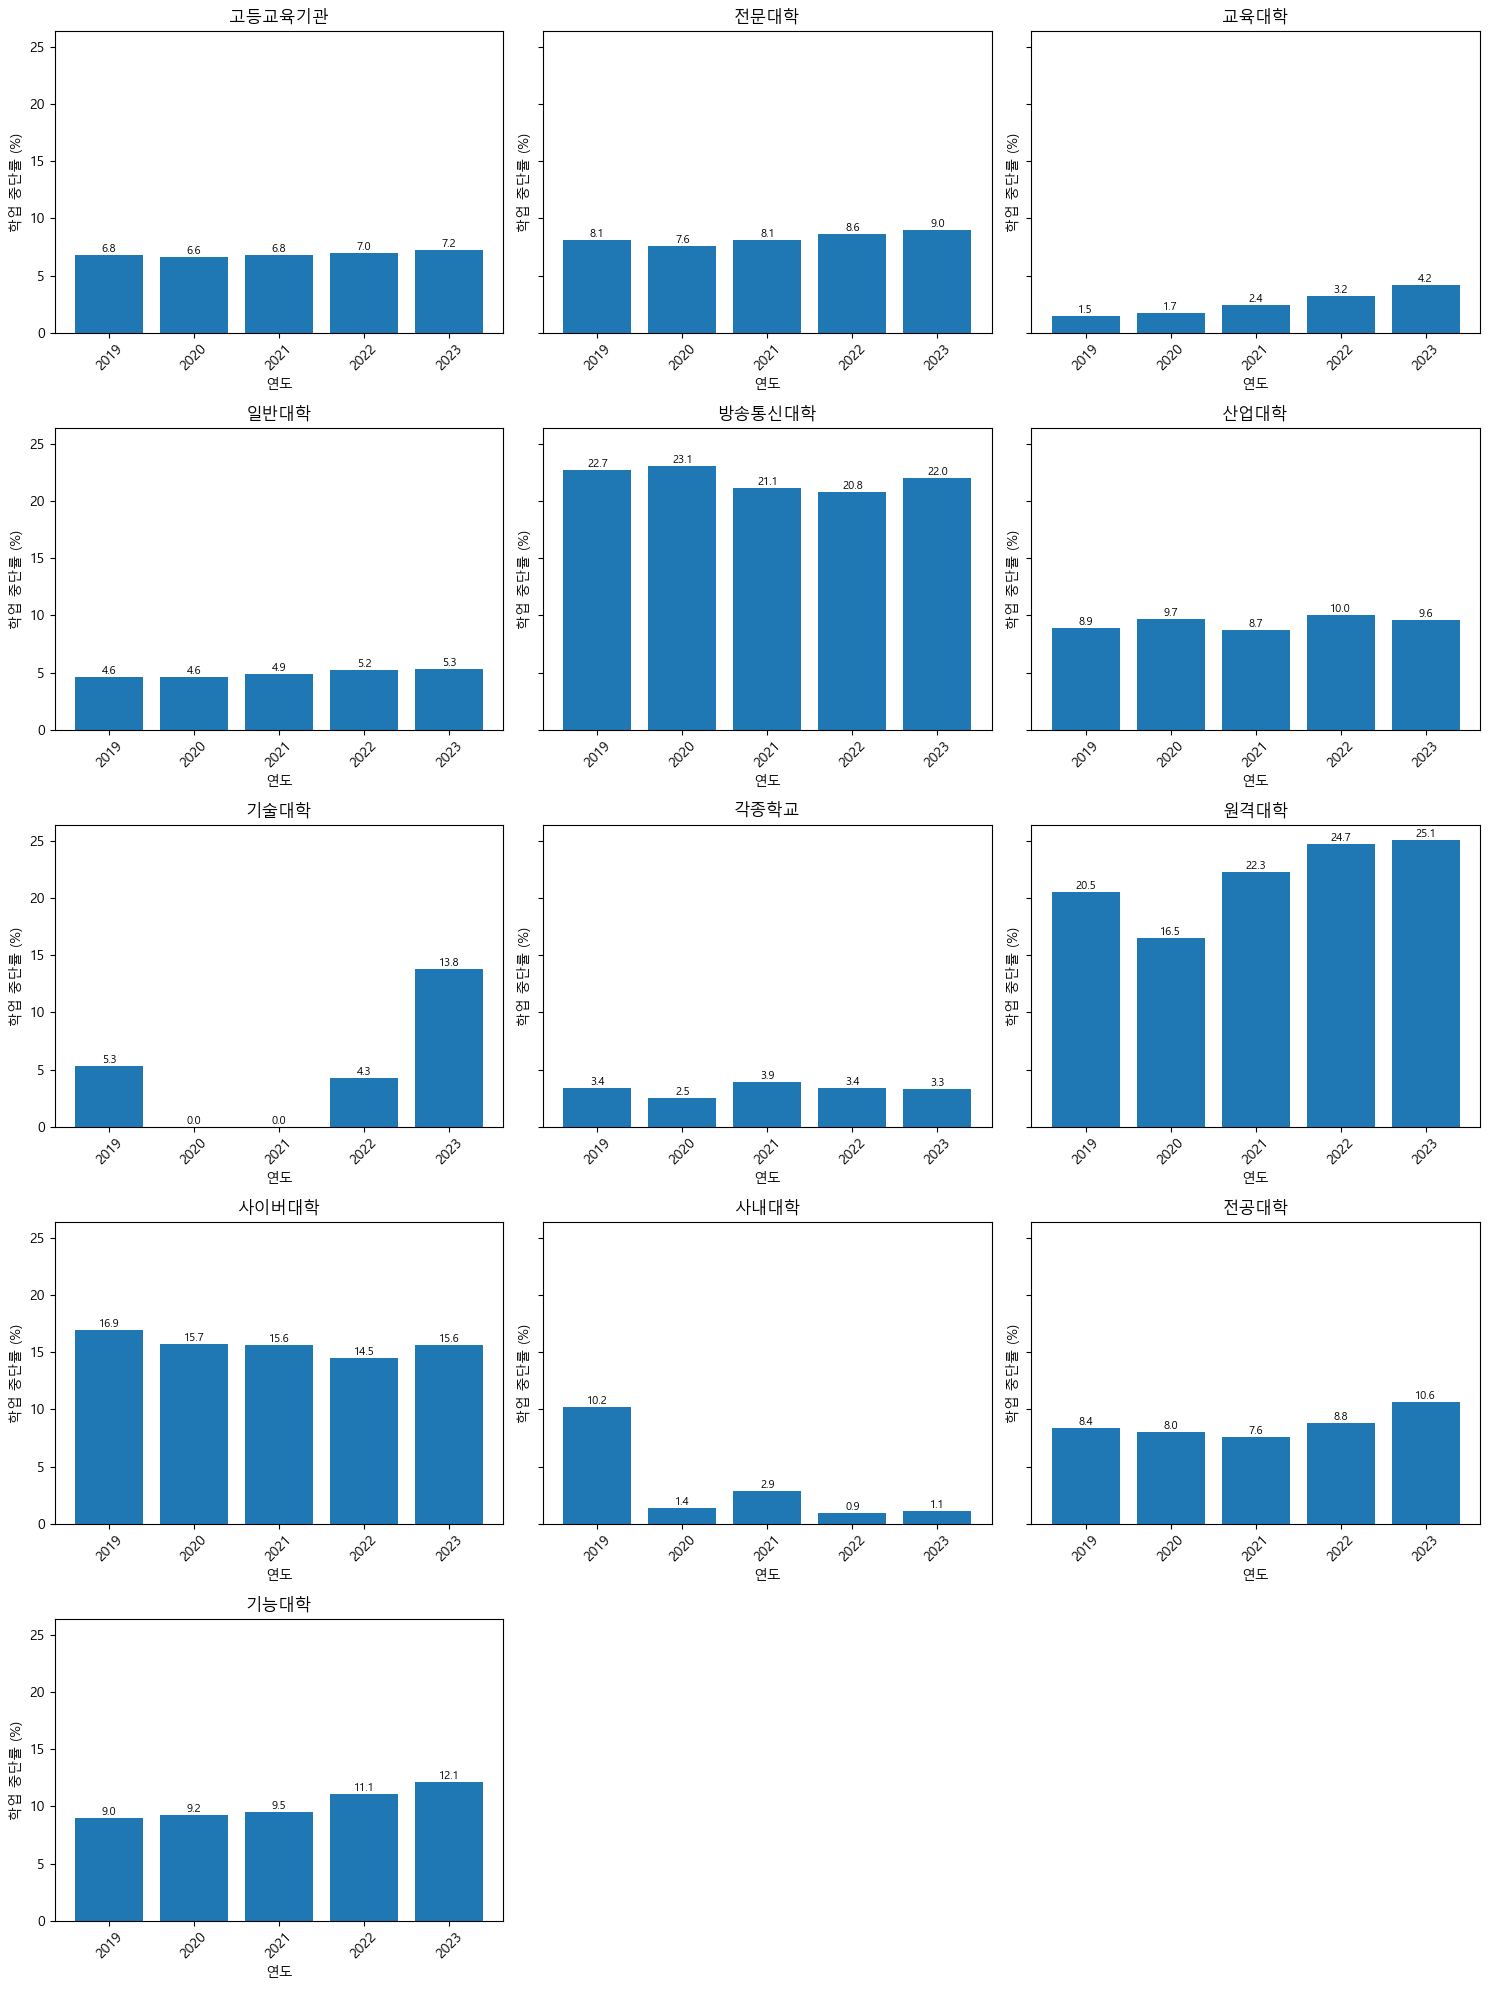

In [8]:
# 5. 작은 다중 막대그래프 설정
cols = 3
rows = (len(institutions) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=True)

for ax, inst in zip(axes.flatten(), institutions):
    values = rates[inst]
    ax.bar(years, values)
    ax.set_title(inst, fontsize=12)
    ax.set_xlabel('연도')
    ax.set_ylabel('학업 중단률 (%)')
    ax.tick_params(axis='x', rotation=45)
    # 각 막대 위에 y값 주석
    for x, y in zip(years, values):
        if not pd.isna(y):
            ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8)

# 빈 서브플롯 제거
for ax in axes.flatten()[len(institutions):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

---

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (학년도, 학년도)            92 non-null     object 
 1   (시도, 시도)              90 non-null     object 
 2   (학업 중단률(%), 고등교육기관)   90 non-null     float64
 3   (학업 중단률(%), 전문대학)     90 non-null     float64
 4   (학업 중단률(%), 교육대학)     90 non-null     object 
 5   (학업 중단률(%), 일반대학)     90 non-null     float64
 6   (학업 중단률(%), 방송통신대학)   90 non-null     object 
 7   (학업 중단률(%), 산업대학)     90 non-null     object 
 8   (학업 중단률(%), 기술대학)     90 non-null     object 
 9   (학업 중단률(%), 각종학교)     90 non-null     object 
 10  (학업 중단률(%), 원격대학)     90 non-null     object 
 11  (학업 중단률(%), 사이버대학)    90 non-null     object 
 12  (학업 중단률(%), 사내대학)     90 non-null     object 
 13  (학업 중단률(%), 전공대학)     90 non-null     object 
 14  (학업 중단률(%), 기능대학)     90 non-null     object 
 15  (학업 중단률(%), 대학원)      90 

In [10]:
df.describe()

학업 중단률(%)                                                         \
          고등교육기관       전문대학       일반대학        대학원    대학원(석사)    대학원(박사)   
count  90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    6.507778   8.463333   5.372222   5.655556   5.728889   5.645556   
std     1.081014   1.873736   1.172343   0.912351   0.902462   1.301353   
min     4.600000   4.800000   3.000000   3.300000   3.200000   2.800000   
25%     5.725000   7.400000   4.600000   5.225000   5.300000   4.900000   
50%     6.350000   8.300000   5.350000   5.700000   5.750000   5.600000   
75%     7.000000   9.100000   6.000000   6.200000   6.200000   6.400000   
max     9.500000  17.700000   9.100000   8.300000   8.600000  10.200000   

               학업중단자                                          ...      재적학생수  \
              고등교육기관          전문대학        교육대학          일반대학  ...       기술대학   
count      90.000000     90.000000   90.000000     90.000000  ...  90.000000   
mean    24420.177778   5303.688889   43.866667  10575.400000  ...   6.066667   
std     50590.038404  10756.577269   94.813383  21028.045087  ...  18.064056   
min      1241.000000    228.000000    0.000000    797.000000  ...   0.000000   
25%      6381.250000   1483.500000    0.000000   2636.250000  ...   0.000000   
50%      7793.500000   1906.500000   23.500000   4976.500000  ...   0.000000   
75%     14270.000000   3708.500000   42.750000   9039.000000  ...   0.000000   
max    226931.000000  52428.000000  621.000000  98351.000000  ...  76.000000   

                                                                          \
              각종학교         원격대학          사이버대학        사내대학          전공대학   
count    90.000000    90.000000      90.000000   90.000000     90.000000   
mean    381.844444   292.066667   15311.488889   42.444444   1656.200000   
std    1055.042157   725.524170   38236.332891   92.858248   4712.248732   
min       0.000000     0.000000       0.000000    0.000000      0.000000   
25%       0.000000     0.000000       0.000000    0.000000      0.000000   
50%       0.000000     0.000000    1243.000000    0.000000      0.000000   
75%       0.000000     0.000000    4484.250000   40.000000      0.000000   
max    3455.000000  3267.000000  145934.000000  451.000000  15267.000000   

                                                                 
               기능대학            대학원        대학원(석사)       대학원(박사)  
count     90.000000      90.000000      90.000000     90.000000  
mean    2630.755556   36394.511111   27335.222222   9059.288889  
std     5256.365276   77839.213504   58711.613111  19181.342277  
min        0.000000    1752.000000    1442.000000    310.000000  
25%      851.000000    7266.250000    5810.750000   1614.250000  
50%     1232.500000   11527.500000    8393.000000   2651.500000  
75%     2389.000000   19498.750000   12280.500000   4182.750000  
max    26828.000000  336596.000000  250518.000000  86078.000000  

[8 rows x 38 columns]

In [11]:
df['학업 중단률(%)'].value_counts(normalize=True, sort=False, dropna=False)

고등교육기관  전문대학  교육대학  일반대학  방송통신대학  산업대학  기술대학  각종학교  원격대학  사이버대학  사내대학  전공대학  기능대학  대학원  대학원(석사)  대학원(박사)
4.6     5.2   -     4.2   -       -     -     -     -     -      3     -     9.7   3.9  3.9      3.8        0.010870
        7.0   1.3   3.0   -       -     -     -     -     -      -     -     9.1   5.4  5.0      6.7        0.010870
4.8     4.8   -     4.5   -       -     -     -     -     -      20.7  -     9     4.3  4.7      3.9        0.010870
        5.2   -     4.3   -       -     -     -     -     -      -     -     12.6  3.6  4.1      3.1        0.010870
        6.5   2.3   3.5   -       -     -     -     -     -      -     -     10    5.9  5.7      6.5        0.010870
                                                                                                              ...   
8.8     12.4  -     6.9   -       -     -     -     -     -      3.7   -     16.3  7.5  7.9      6.4        0.010870
9.3     10.2  -     9.1   -       -     -     -     -     -      0     -    

In [12]:
df.isnull().sum()

학년도        학년도        0
시도         시도         2
학업 중단률(%)  고등교육기관     2
           전문대학       2
           교육대학       2
           일반대학       2
           방송통신대학     2
           산업대학       2
           기술대학       2
           각종학교       2
           원격대학       2
           사이버대학      2
           사내대학       2
           전공대학       2
           기능대학       2
           대학원        2
           대학원(석사)    2
           대학원(박사)    2
학업중단자      고등교육기관     2
           전문대학       2
           교육대학       2
           일반대학       2
           방송통신대학     2
           산업대학       2
           기술대학       2
           각종학교       2
           원격대학       2
           사이버대학      2
           사내대학       2
           전공대학       2
           기능대학       2
           대학원        2
           대학원(석사)    2
           대학원(박사)    2
재적학생수      고등교육기관     2
           전문대학       2
           교육대학       2
           일반대학       2
           방송통신대학     2
           산업대학       2
           기술대학       2
           각종학교 

In [13]:
{
    "cells": [
        {
            "cell_type": "markdown",
            "metadata": {
                "language": "markdown"
            },
            "source": [
                "## 4. 시계열 분석",
                "연도별 학업중단률 추이를 분석합니다."
            ]
        },
        {
            "cell_type": "code",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# 연도별 학업중단률 추이 분석",
                "plt.figure(figsize=(12, 6))",
                "for inst in institutions:",
                "    plt.plot(years, rates[inst], marker='o', label=inst)",
                "plt.title('연도별 학업중단률 추이')",
                "plt.xlabel('연도')",
                "plt.ylabel('학업중단률 (%)')",
                "plt.legend()",
                "plt.grid(True)",
                "plt.show()"
            ]
        },
        {
            "cell_type": "markdown",
            "metadata": {
                "language": "markdown"
            },
            "source": [
                "## 5. 상관관계 분석",
                "주요 변수 간의 상관관계를 분석합니다."
            ]
        },
        {
            "cell_type": "code",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# 상관관계 분석",
                "correlation_matrix = rates.corr()",
                "plt.figure(figsize=(10, 8))",
                "sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')",
                "plt.title('학업중단률 변수 간 상관관계')",
                "plt.show()"
            ]
        },
        {
            "cell_type": "markdown",
            "metadata": {
                "language": "markdown"
            },
            "source": [
                "## 6. 결측치 처리",
                "결측치의 분포를 확인하고 처리 방안을 제안합니다."
            ]
        },
        {
            "cell_type": "code",
            "metadata": {
                "language": "python"
            },
            "source": [
                "# 결측치 확인",
                "missing_values = rates.isnull().sum()",
                "print('결측치 개수:', missing_values)",
                "",
                "# 결측치 시각화",
                "plt.figure(figsize=(12, 6))",
                "sns.heatmap(rates.isnull(), cbar=False, cmap='viridis')",
                "plt.title('결측치 분포')",
                "plt.show()"
            ]
        }
    ]
}

{'cells': [{'cell_type': 'markdown',
   'metadata': {'language': 'markdown'},
   'source': ['## 4. 시계열 분석', '연도별 학업중단률 추이를 분석합니다.']},
  {'cell_type': 'code',
   'metadata': {'language': 'python'},
   'source': ['# 연도별 학업중단률 추이 분석',
    'plt.figure(figsize=(12, 6))',
    'for inst in institutions:',
    "    plt.plot(years, rates[inst], marker='o', label=inst)",
    "plt.title('연도별 학업중단률 추이')",
    "plt.xlabel('연도')",
    "plt.ylabel('학업중단률 (%)')",
    'plt.legend()',
    'plt.grid(True)',
    'plt.show()']},
  {'cell_type': 'markdown',
   'metadata': {'language': 'markdown'},
   'source': ['## 5. 상관관계 분석', '주요 변수 간의 상관관계를 분석합니다.']},
  {'cell_type': 'code',
   'metadata': {'language': 'python'},
   'source': ['# 상관관계 분석',
    'correlation_matrix = rates.corr()',
    'plt.figure(figsize=(10, 8))',
    "sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')",
    "plt.title('학업중단률 변수 간 상관관계')",
    'plt.show()']},
  {'cell_type': 'markdown',
   'metadata': {'language': 'markdown'},


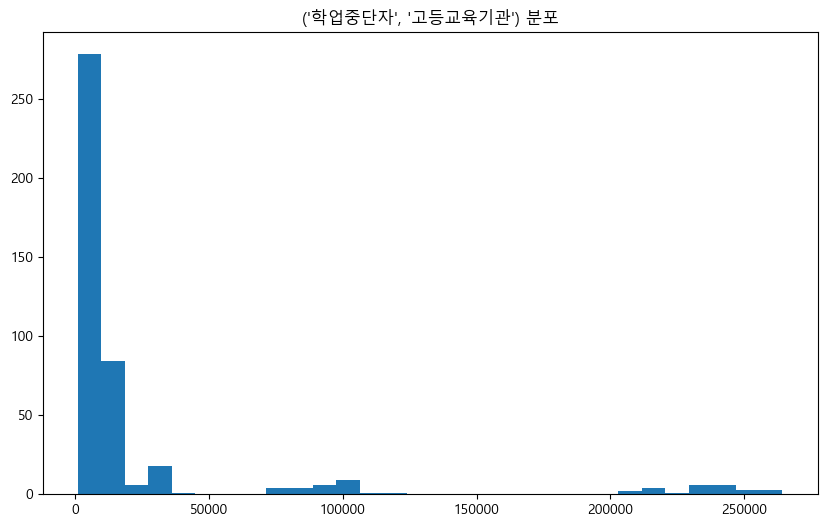


('학업중단자', '고등교육기관')의 기술통계량:
count       437.000000
mean      26972.494279
std       55620.691862
min        1021.000000
25%        6364.000000
50%        8107.000000
75%       15044.000000
max      264363.000000
Name: (학업중단자, 고등교육기관), dtype: float64


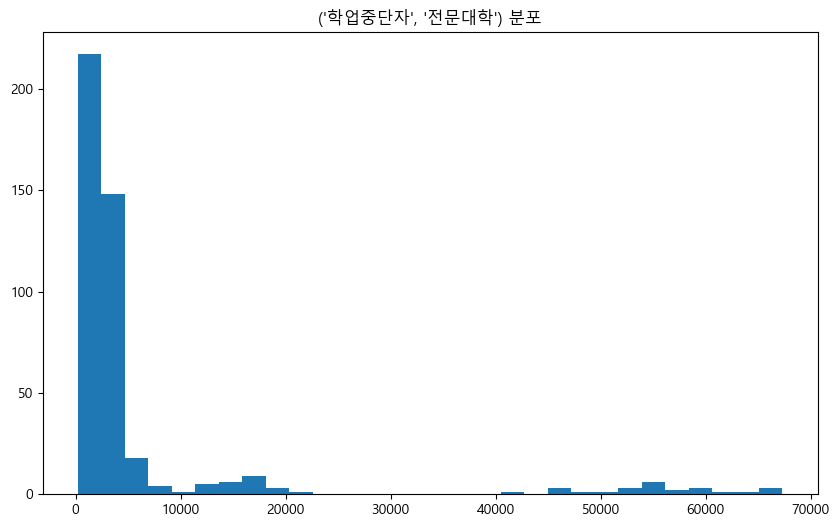


('학업중단자', '전문대학')의 기술통계량:
count      437.000000
mean      6318.114416
std      12627.826021
min        228.000000
25%       1759.000000
50%       2477.000000
75%       4014.000000
max      67323.000000
Name: (학업중단자, 전문대학), dtype: float64


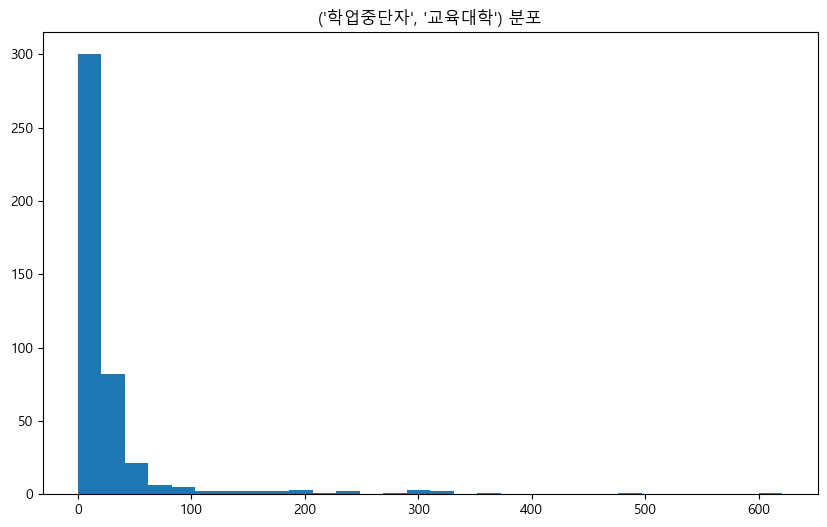


('학업중단자', '교육대학')의 기술통계량:
count    437.000000
mean      27.034325
std       61.399887
min        0.000000
25%        0.000000
50%       12.000000
75%       24.000000
max      621.000000
Name: (학업중단자, 교육대학), dtype: float64


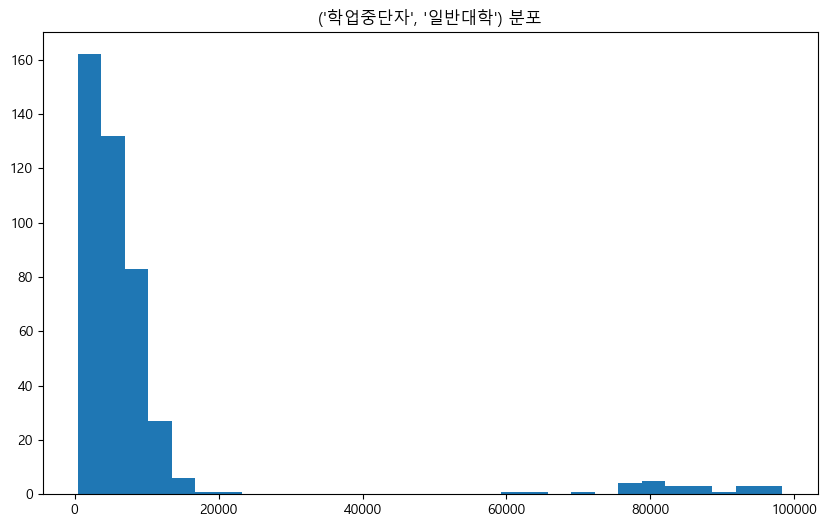


('학업중단자', '일반대학')의 기술통계량:
count      437.000000
mean      9526.745995
std      18665.520835
min        466.000000
25%       2325.000000
50%       4564.000000
75%       8326.000000
max      98351.000000
Name: (학업중단자, 일반대학), dtype: float64


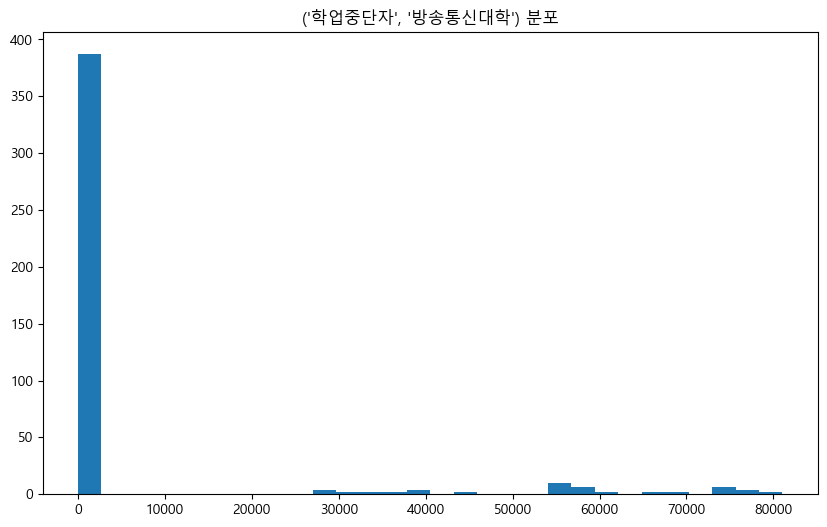


('학업중단자', '방송통신대학')의 기술통계량:
count      437.000000
mean      6316.549199
std      18439.419402
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      81049.000000
Name: (학업중단자, 방송통신대학), dtype: float64


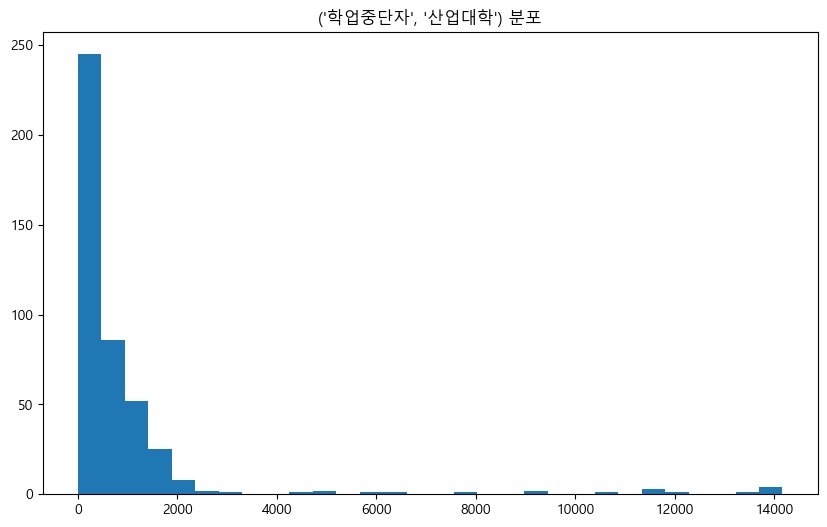


('학업중단자', '산업대학')의 기술통계량:
count      437.000000
mean       875.025172
std       2095.855371
min          0.000000
25%          0.000000
50%        315.000000
75%        926.000000
max      14165.000000
Name: (학업중단자, 산업대학), dtype: float64


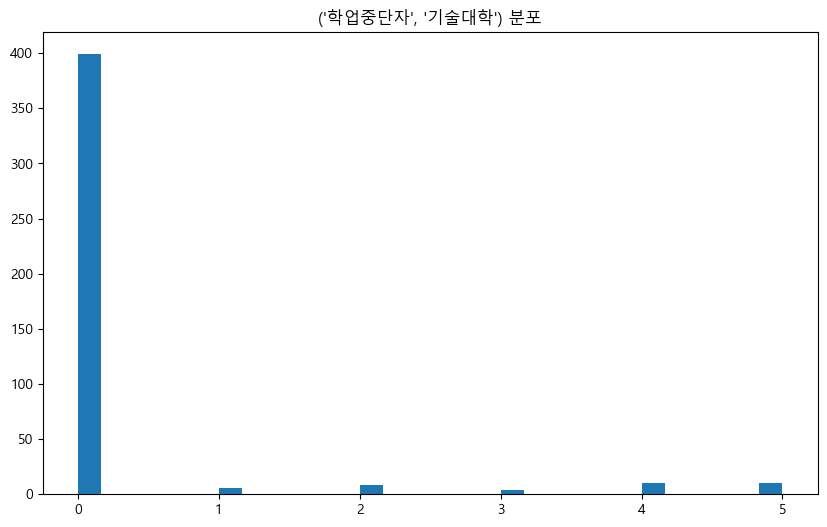


('학업중단자', '기술대학')의 기술통계량:
count    437.000000
mean       0.283753
std        1.014589
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: (학업중단자, 기술대학), dtype: float64


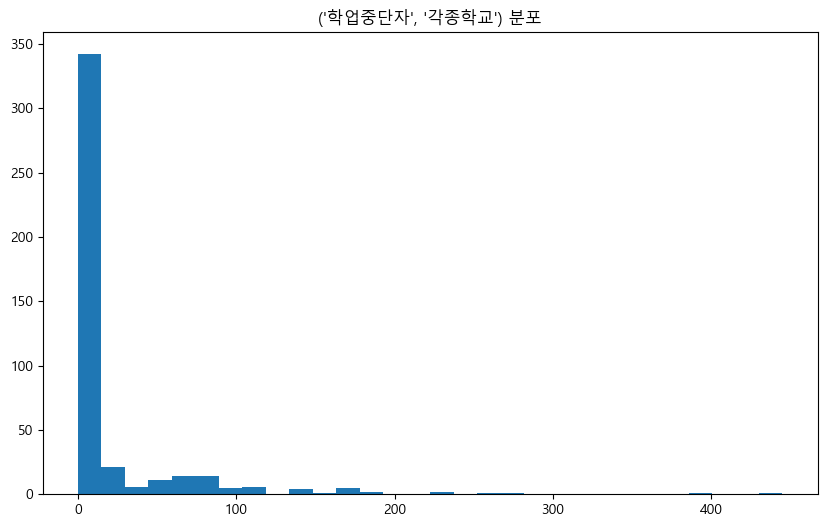


('학업중단자', '각종학교')의 기술통계량:
count    437.000000
mean      19.125858
std       49.770069
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max      445.000000
Name: (학업중단자, 각종학교), dtype: float64


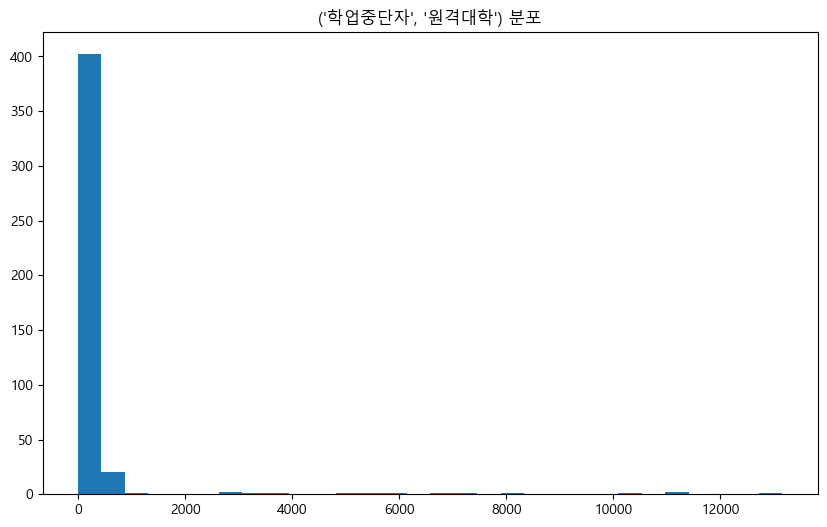


('학업중단자', '원격대학')의 기술통계량:
count      437.000000
mean       275.038902
std       1359.650401
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      13159.000000
Name: (학업중단자, 원격대학), dtype: float64


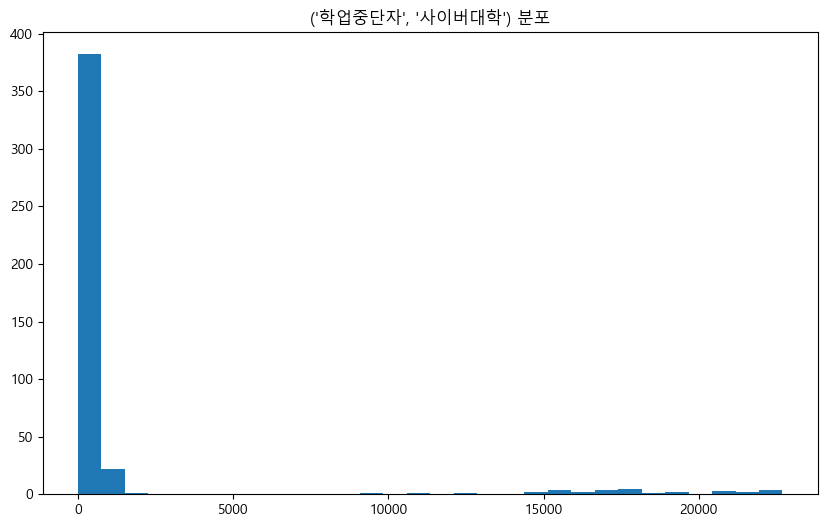


('학업중단자', '사이버대학')의 기술통계량:
count      437.000000
mean      1428.471396
std       4662.425205
min          0.000000
25%          0.000000
50%          0.000000
75%        270.000000
max      22696.000000
Name: (학업중단자, 사이버대학), dtype: float64


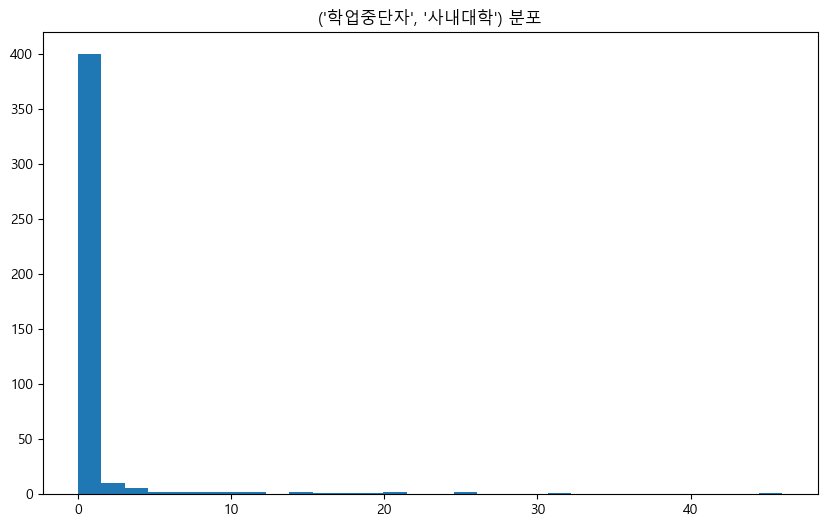


('학업중단자', '사내대학')의 기술통계량:
count    437.000000
mean       0.915332
std        4.085067
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       46.000000
Name: (학업중단자, 사내대학), dtype: float64


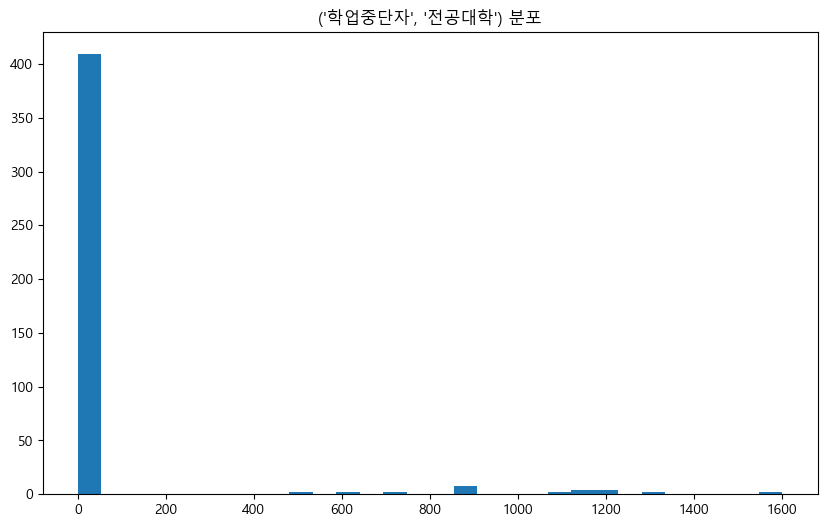


('학업중단자', '전공대학')의 기술통계량:
count     437.000000
mean       64.782609
std       257.696831
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1602.000000
Name: (학업중단자, 전공대학), dtype: float64


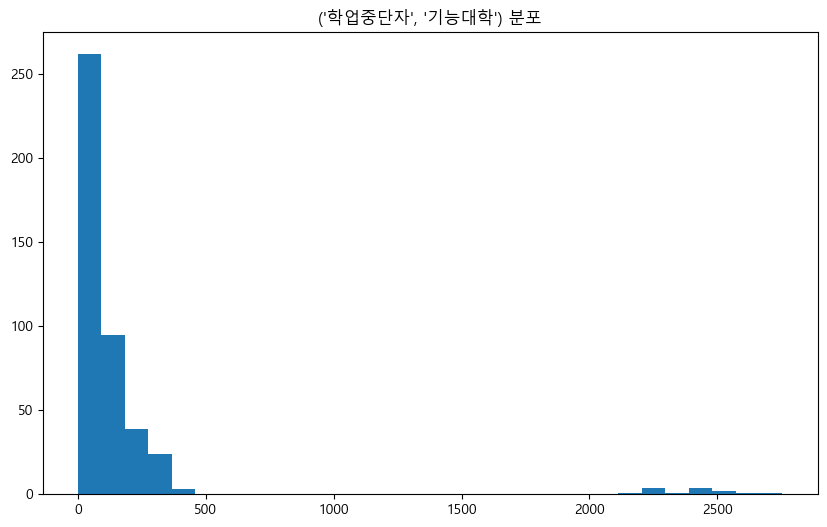


('학업중단자', '기능대학')의 기술통계량:
count     437.000000
mean      153.647597
std       421.724664
min         0.000000
25%         0.000000
50%        41.000000
75%       140.000000
max      2755.000000
Name: (학업중단자, 기능대학), dtype: float64


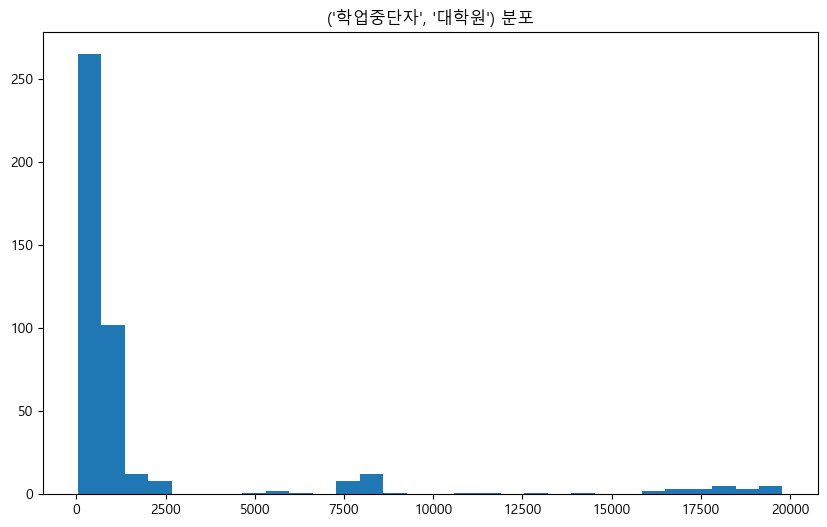


('학업중단자', '대학원')의 기술통계량:
count      437.000000
mean      1966.759725
std       4158.095602
min         44.000000
25%        375.000000
50%        613.000000
75%        936.000000
max      19793.000000
Name: (학업중단자, 대학원), dtype: float64


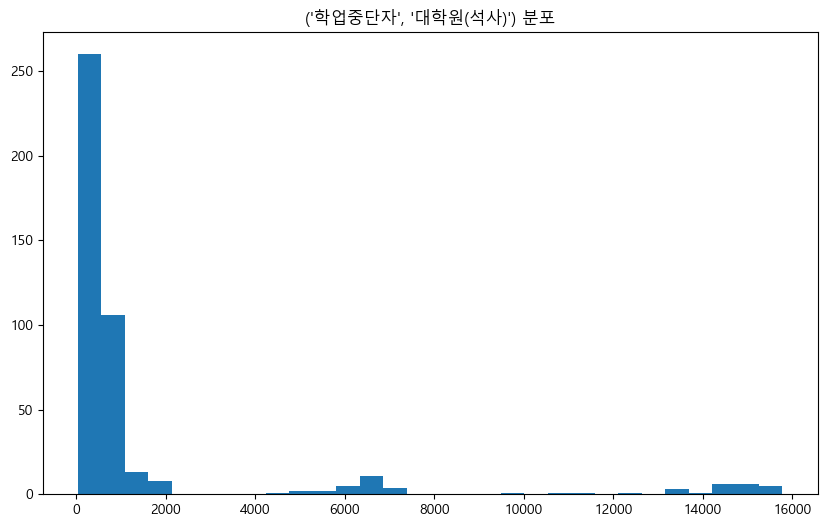


('학업중단자', '대학원(석사)')의 기술통계량:
count      437.000000
mean      1615.556064
std       3403.376559
min         40.000000
25%        311.000000
50%        517.000000
75%        716.000000
max      15779.000000
Name: (학업중단자, 대학원(석사)), dtype: float64


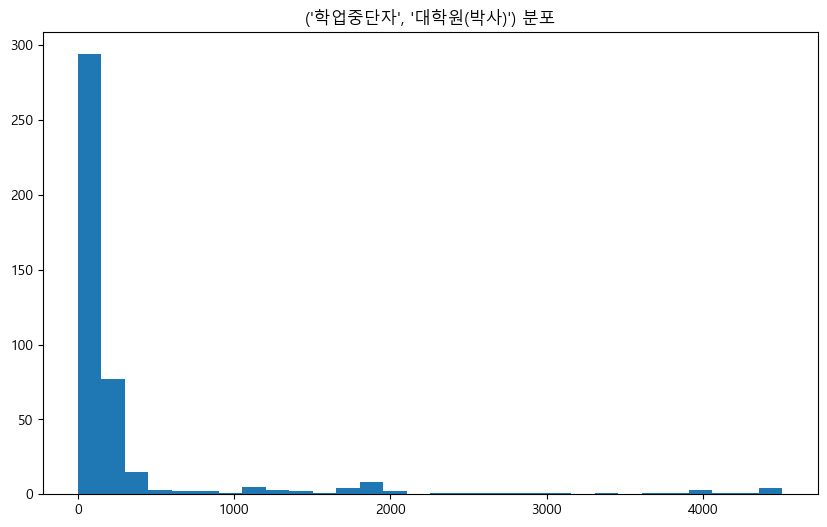


('학업중단자', '대학원(박사)')의 기술통계량:
count     437.000000
mean      351.203661
std       792.314588
min         1.000000
25%        57.000000
50%        99.000000
75%       185.000000
max      4509.000000
Name: (학업중단자, 대학원(박사)), dtype: float64


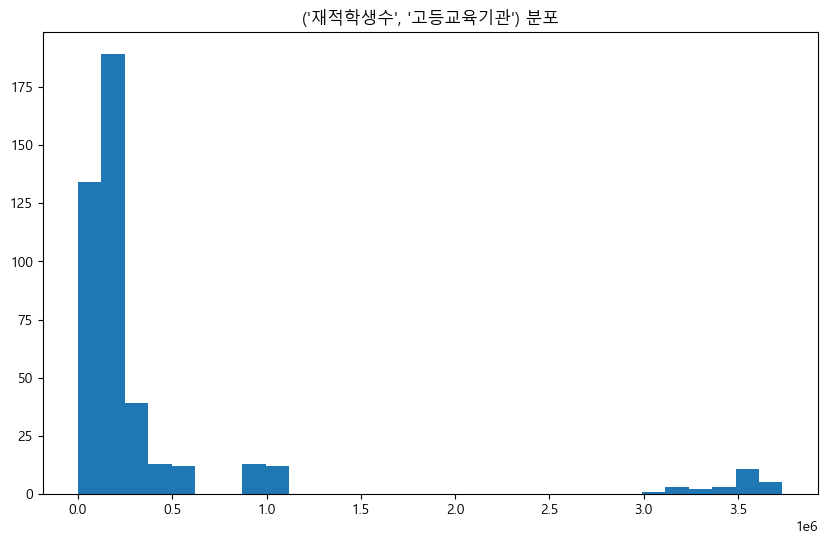


('재적학생수', '고등교육기관')의 기술통계량:
count    4.370000e+02
mean     3.976307e+05
std      7.921673e+05
min      0.000000e+00
25%      1.038170e+05
50%      1.433230e+05
75%      2.510760e+05
max      3.735706e+06
Name: (재적학생수, 고등교육기관), dtype: float64


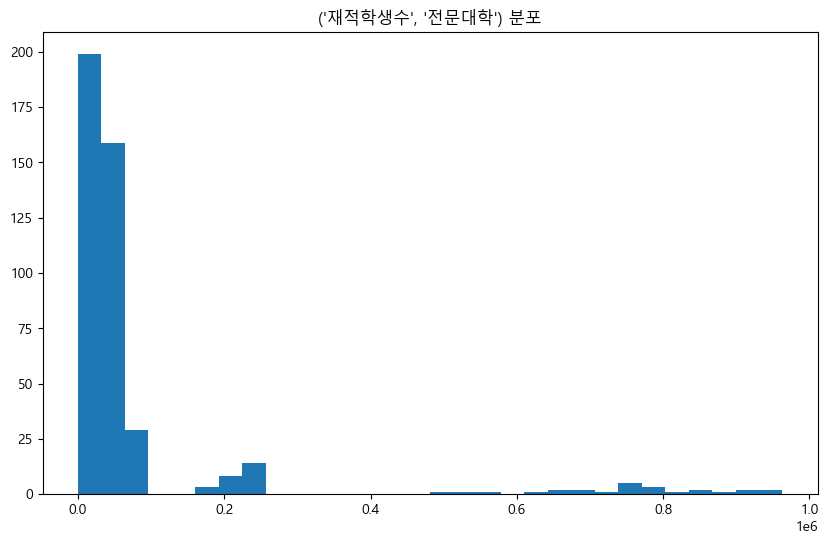


('재적학생수', '전문대학')의 기술통계량:
count       437.000000
mean      86812.141876
std      174584.906764
min           0.000000
25%       23932.000000
50%       34388.000000
75%       58117.000000
max      963129.000000
Name: (재적학생수, 전문대학), dtype: float64


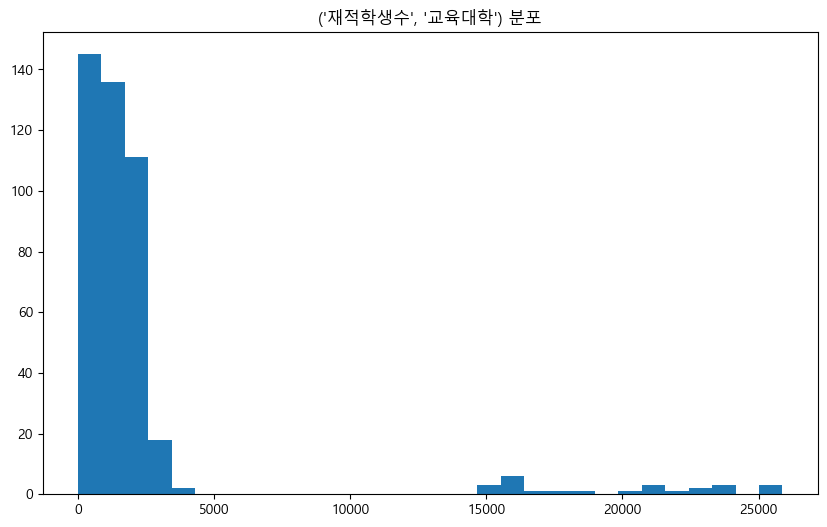


('재적학생수', '교육대학')의 기술통계량:
count      437.000000
mean      2254.178490
std       4487.356079
min          0.000000
25%          0.000000
50%       1434.000000
75%       1997.000000
max      25881.000000
Name: (재적학생수, 교육대학), dtype: float64


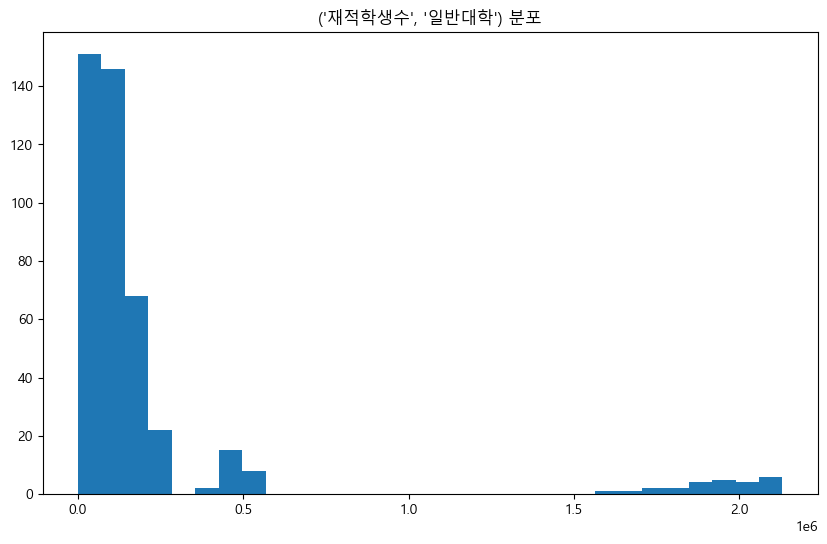


('재적학생수', '일반대학')의 기술통계량:
count    4.370000e+02
mean     2.214508e+05
std      4.368557e+05
min      0.000000e+00
25%      5.117000e+04
50%      8.804800e+04
75%      1.671720e+05
max      2.130046e+06
Name: (재적학생수, 일반대학), dtype: float64


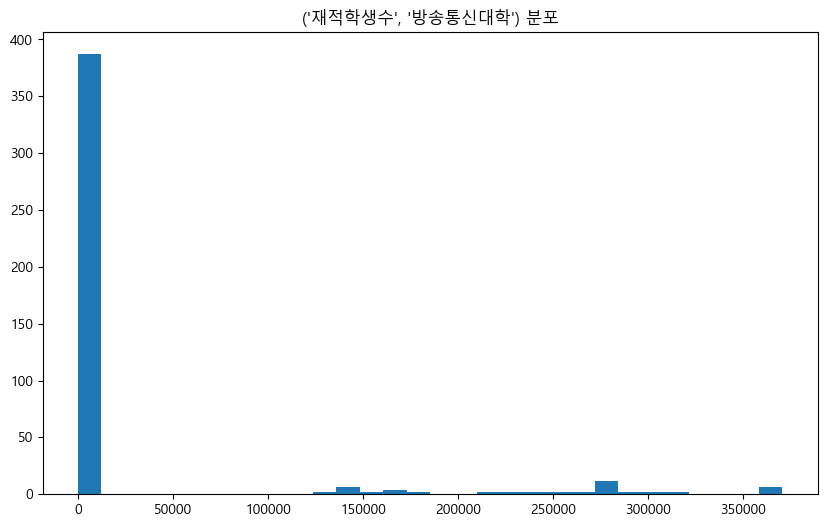


('재적학생수', '방송통신대학')의 기술통계량:
count       437.000000
mean      27926.544622
std       81590.307805
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      370661.000000
Name: (재적학생수, 방송통신대학), dtype: float64


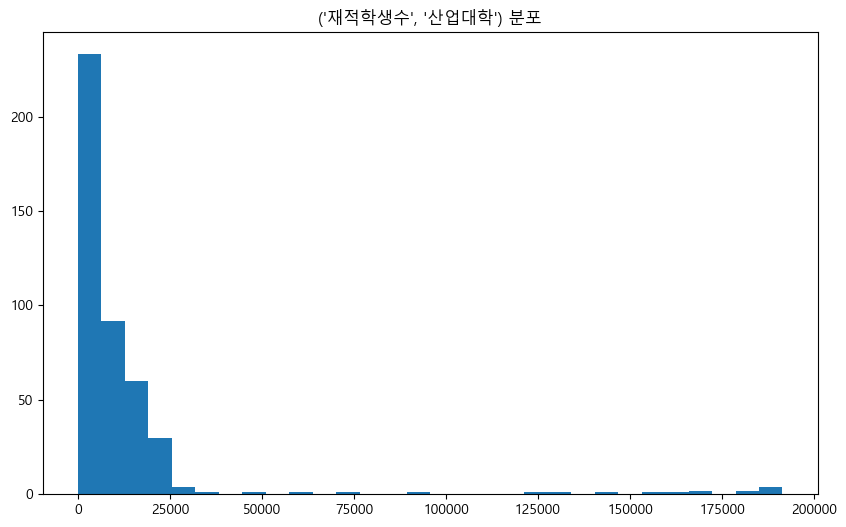


('재적학생수', '산업대학')의 기술통계량:
count       437.000000
mean      11912.109840
std       29261.072337
min           0.000000
25%           0.000000
50%        3280.000000
75%       12955.000000
max      191455.000000
Name: (재적학생수, 산업대학), dtype: float64


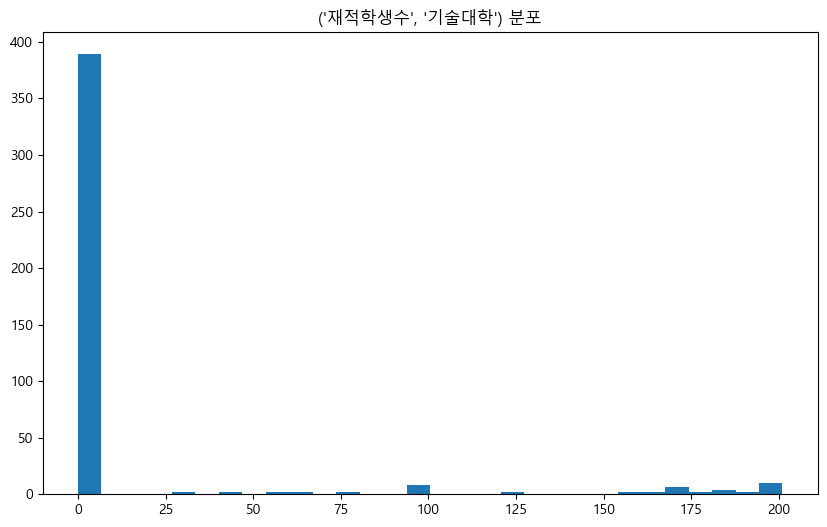


('재적학생수', '기술대학')의 기술통계량:
count    437.000000
mean      15.258581
std       47.192165
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      201.000000
Name: (재적학생수, 기술대학), dtype: float64


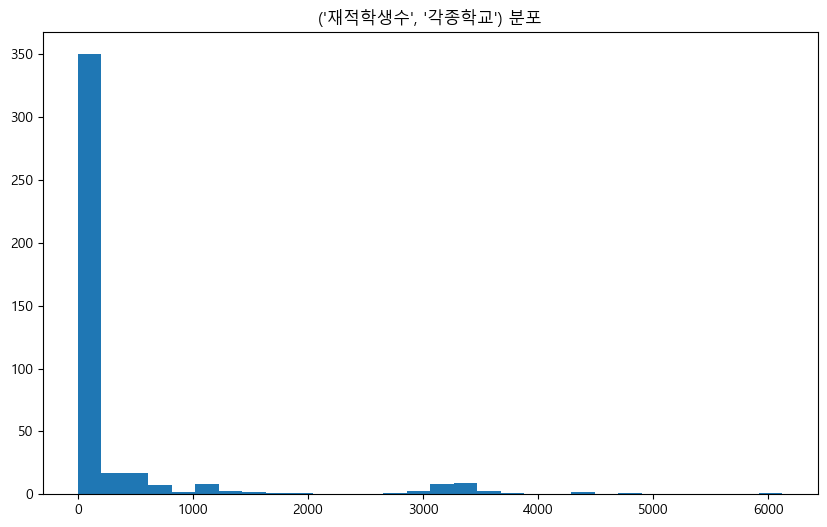


('재적학생수', '각종학교')의 기술통계량:
count     437.000000
mean      331.821510
std       911.763733
min         0.000000
25%         0.000000
50%         0.000000
75%        44.000000
max      6126.000000
Name: (재적학생수, 각종학교), dtype: float64


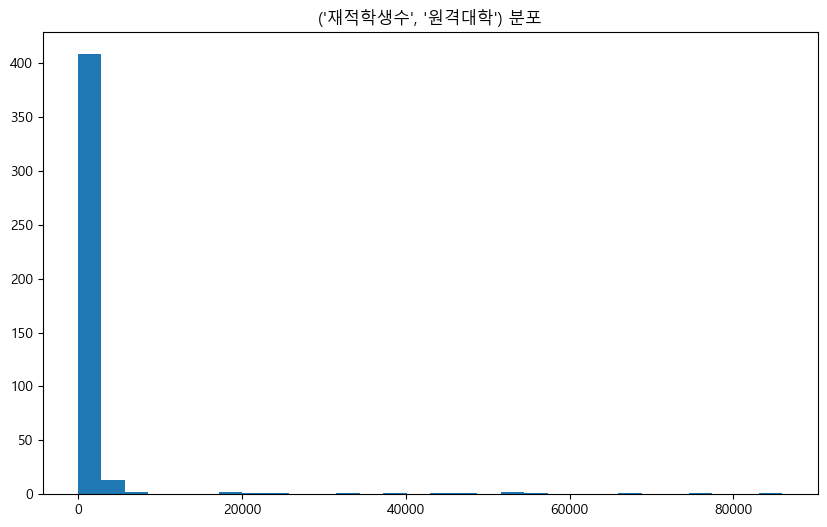


('재적학생수', '원격대학')의 기술통계량:
count      437.000000
mean      1819.592677
std       8883.945315
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      85984.000000
Name: (재적학생수, 원격대학), dtype: float64


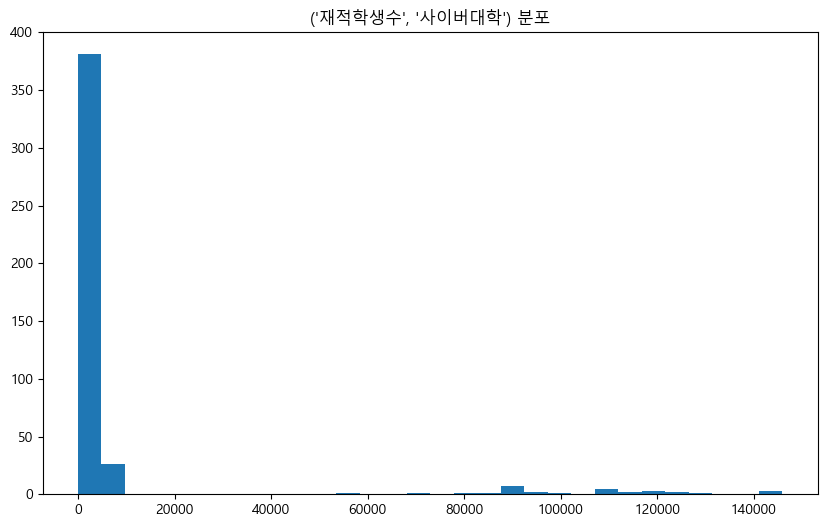


('재적학생수', '사이버대학')의 기술통계량:
count       437.000000
mean       8164.970252
std       27063.864287
min           0.000000
25%           0.000000
50%           0.000000
75%        2553.000000
max      145934.000000
Name: (재적학생수, 사이버대학), dtype: float64


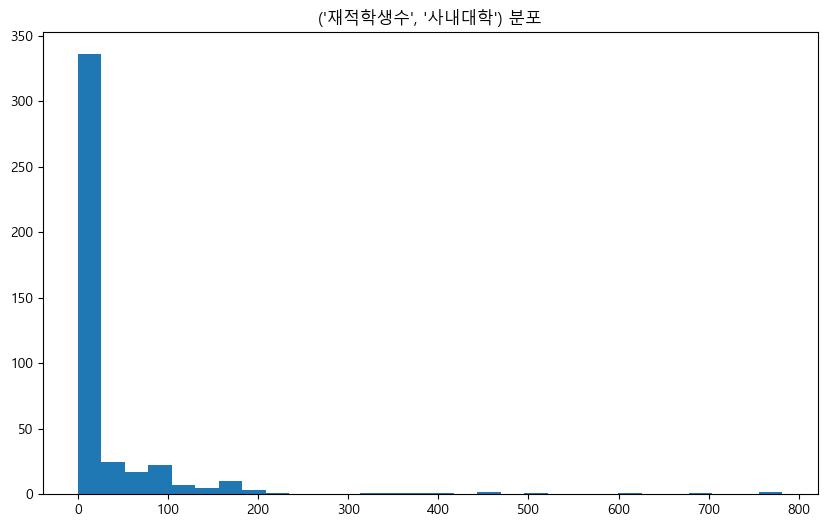


('재적학생수', '사내대학')의 기술통계량:
count    437.000000
mean      31.830664
std       93.050882
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      782.000000
Name: (재적학생수, 사내대학), dtype: float64


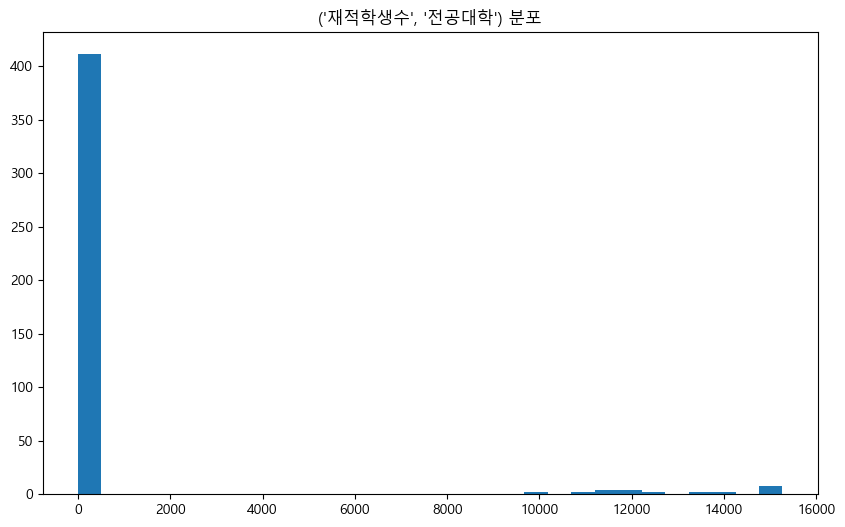


('재적학생수', '전공대학')의 기술통계량:
count      437.000000
mean       767.739130
std       3087.052776
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15267.000000
Name: (재적학생수, 전공대학), dtype: float64


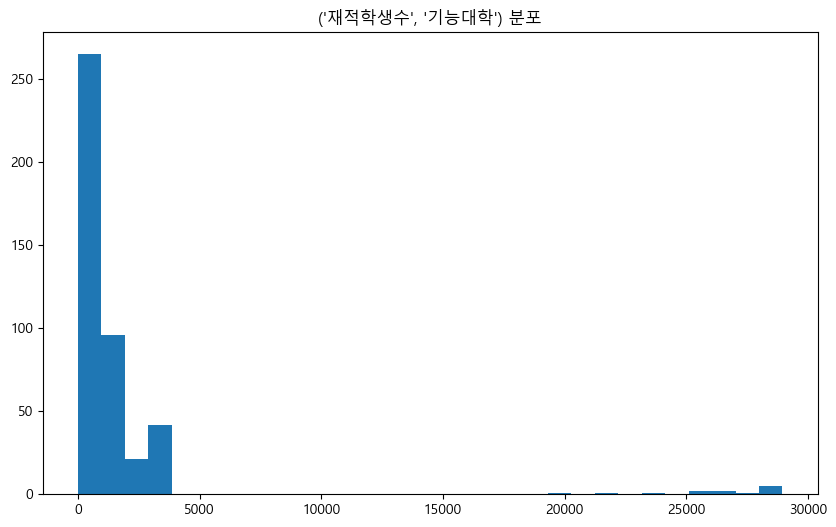


('재적학생수', '기능대학')의 기술통계량:
count      437.000000
mean      1564.059497
std       4488.782621
min          0.000000
25%          0.000000
50%          0.000000
75%       1450.000000
max      28956.000000
Name: (재적학생수, 기능대학), dtype: float64


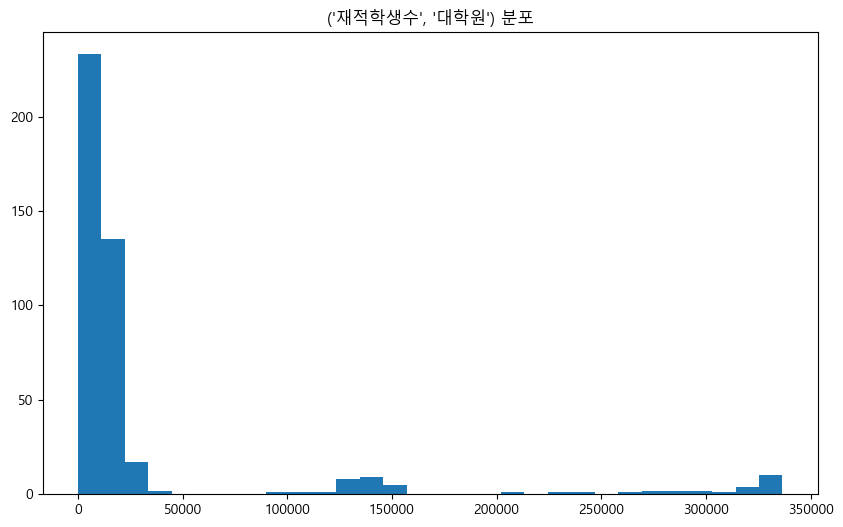


('재적학생수', '대학원')의 기술통계량:
count       437.000000
mean      34579.675057
std       72957.006211
min           0.000000
25%        7240.000000
50%       11064.000000
75%       15971.000000
max      336596.000000
Name: (재적학생수, 대학원), dtype: float64


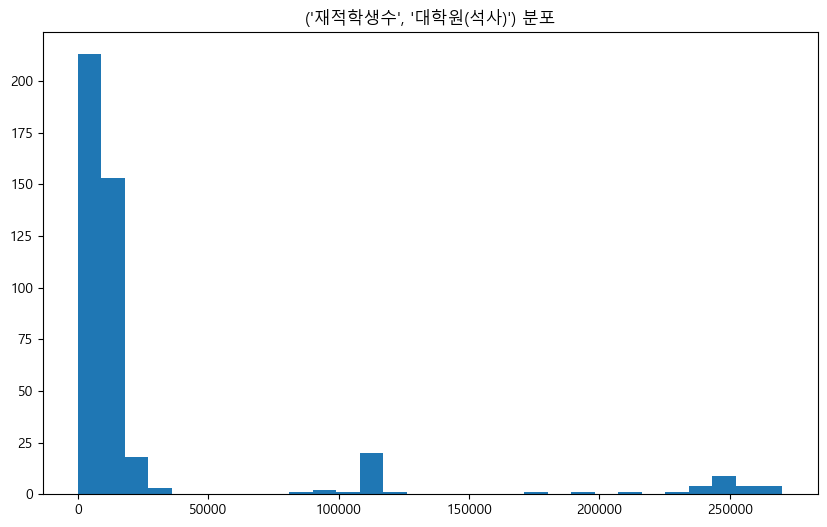


('재적학생수', '대학원(석사)')의 기술통계량:
count       437.000000
mean      27893.176201
std       58631.496657
min           0.000000
25%        5888.000000
50%        9082.000000
75%       12288.000000
max      270234.000000
Name: (재적학생수, 대학원(석사)), dtype: float64


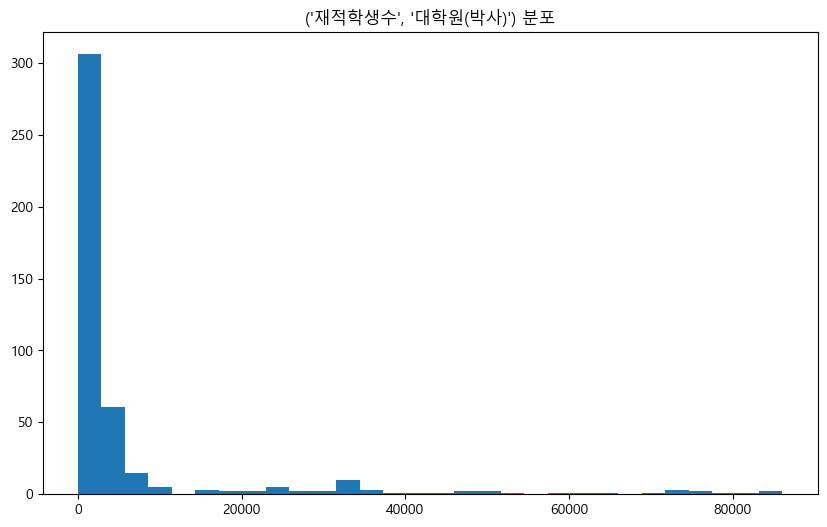


('재적학생수', '대학원(박사)')의 기술통계량:
count      437.000000
mean      6686.498856
std      14775.000007
min          0.000000
25%       1125.000000
50%       1841.000000
75%       3418.000000
max      86078.000000
Name: (재적학생수, 대학원(박사)), dtype: float64


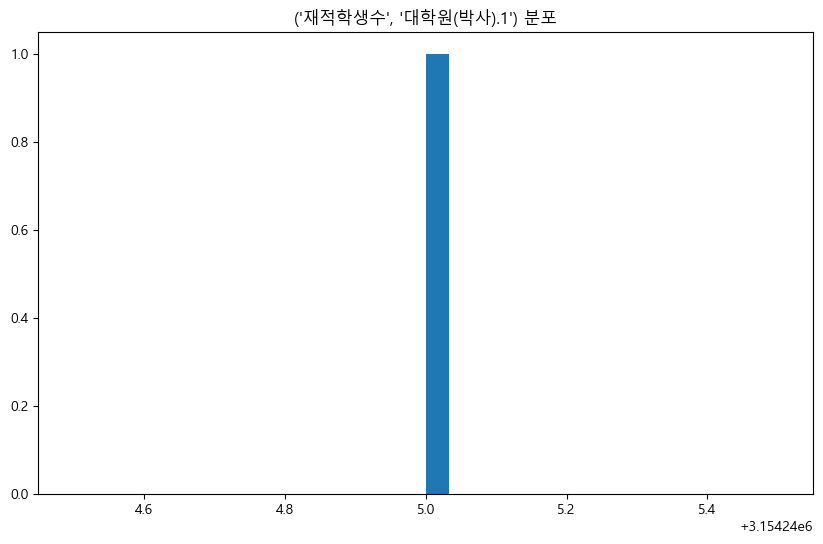


('재적학생수', '대학원(박사).1')의 기술통계량:
count          1.0
mean     3154245.0
std            NaN
min      3154245.0
25%      3154245.0
50%      3154245.0
75%      3154245.0
max      3154245.0
Name: (재적학생수, 대학원(박사).1), dtype: float64


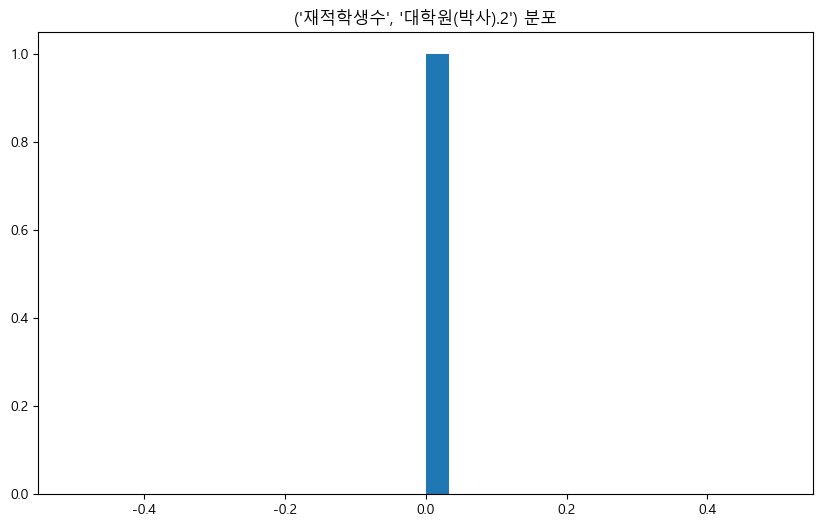


('재적학생수', '대학원(박사).2')의 기술통계량:
count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: (재적학생수, 대학원(박사).2), dtype: float64


In [45]:
# 수치형 변수의 분포 확인
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=30)
    plt.title(f'{col} 분포')
    plt.show()
    
    # 기술통계량
    print(f"\n{col}의 기술통계량:")
    print(df[col].describe())

TypeError: unhashable type: 'numpy.ndarray'

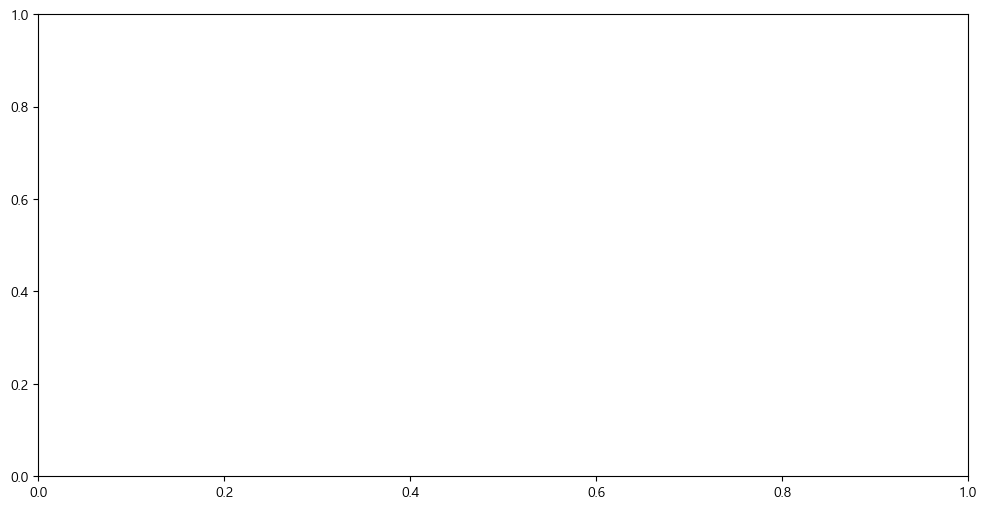

In [36]:
# 연도별 추이 분석
plt.figure(figsize=(12, 6))
plt.plot(df['학년도'], df['학업 중단률(%)'], marker='o')
plt.title('연도별 학업중단률 추이')
plt.xlabel('연도')
plt.ylabel('학업중단률')
plt.grid(True)
plt.show()

In [38]:
import seaborn as sns
# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('변수간 상관관계')
plt.show()

ValueError: could not convert string to float: '주석'

<Figure size 1000x800 with 0 Axes>

In [42]:
# 범주형 변수별 통계
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}별 통계:")
    print(df.groupby(col)['학업 중단률(%)'].describe())
    
    # 시각화
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='학업 중단률(%)', data=df)
    plt.title(f'{col}별 학업중단률 분포')
    plt.xticks(rotation=45)
    plt.show()


('학년도', '학년도')별 통계:
                                             학업 중단률(%)                         \
                                                고등교육기관                   전문대학   
                                                 count unique  top freq count   
(학년도, 학년도)                                                                      
1999                                                17     16    4    2  17.0   
2000                                              17.0   14.0  4.1  2.0  17.0   
2001                                              17.0   16.0  5.5  2.0  17.0   
2002                                              17.0   10.0  5.6  3.0  17.0   
2003                                              17.0   12.0  5.9  4.0  17.0   
2004                                              17.0   13.0  5.2  2.0  17.0   
2005                                              17.0   14.0  7.1  2.0  17.0   
2006                                              17.0   13.0  5.7  3.0  17.0   
2007   

ValueError: 2

<Figure size 1000x600 with 0 Axes>